# **Digital Marketing - AI Prediction**






# Prepare the environment



In [ ]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from scipy.stats import norm

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

import folium



from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

In [ ]:
# AI Libraries

from sklearn.metrics import accuracy_score      
from sklearn.metrics import confusion_matrix

# Read and Examine the dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#Loading
Advertising_data  = pd.read_csv('/content/drive/My Drive//DataScience_Project/Advertising/advertising.csv')
Advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Preparing the data for analysis







In [ ]:
# timestamp
Advertising_data['Timestamp'] = pd.to_datetime(Advertising_data['Timestamp'])

Advertising_data['Month'] = Advertising_data['Timestamp'].dt.month
Advertising_data['Day of the month'] = Advertising_data['Timestamp'].dt.day
Advertising_data["Day of the week"] = Advertising_data['Timestamp'].dt.dayofweek
Advertising_data['Hour'] = Advertising_data['Timestamp'].dt.hour
Advertising_data = Advertising_data.drop(['Timestamp'], axis=1)
Advertising_data = Advertising_data.drop(['Ad Topic Line'], axis=1)
Advertising_data = Advertising_data.drop(['City'], axis=1)
Advertising_data = Advertising_data.drop(['Country'], axis=1)
Advertising_data.rename(columns = {'Male':'Gender'},inplace=True) 


In [ ]:
Advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [ ]:
from sklearn.model_selection import train_test_split

#X = Advertising_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    #'Male', 'Month', 'Day of the month' ,'Day of the week']]
X = Advertising_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Gender','Month','Day of the month','Day of the week','Hour']]
y = Advertising_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Random Forest Classifier







In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9515151515151515


No handles with labels found to put in legend.


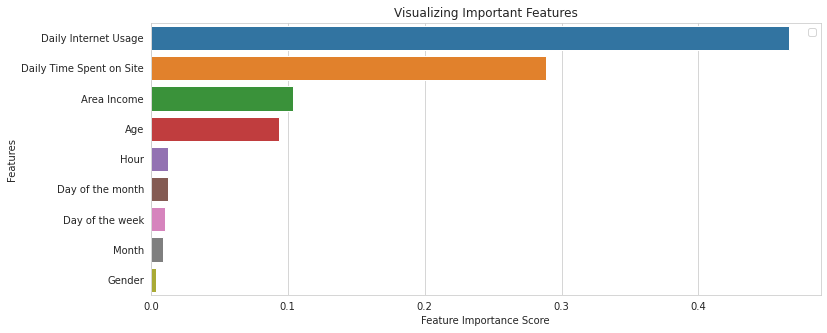

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = clf.fit(X_train, y_train)
features=Advertising_data.columns[[0,1,2,3,4,6,7,8,9]]

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

# Creating a bar plot

# Add labels to your graph
plt.figure(figsize=(12,5))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
sns.barplot(x=feature_imp, y=feature_imp.index)

In [ ]:
X = Advertising_data[[ 'Daily Internet Usage','Daily Time Spent on Site','Area Income','Age']]
y = Advertising_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9484848484848485


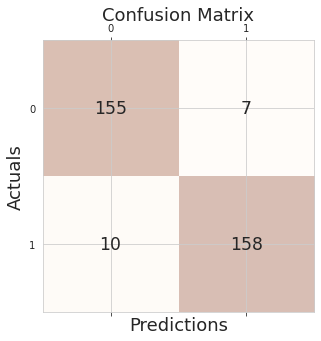

In [ ]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression







In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[156   6]
 [ 25 143]]


# Decision Tree Classifier







In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9393939393939394

Confusion matrix:
[[153   9]
 [ 11 157]]


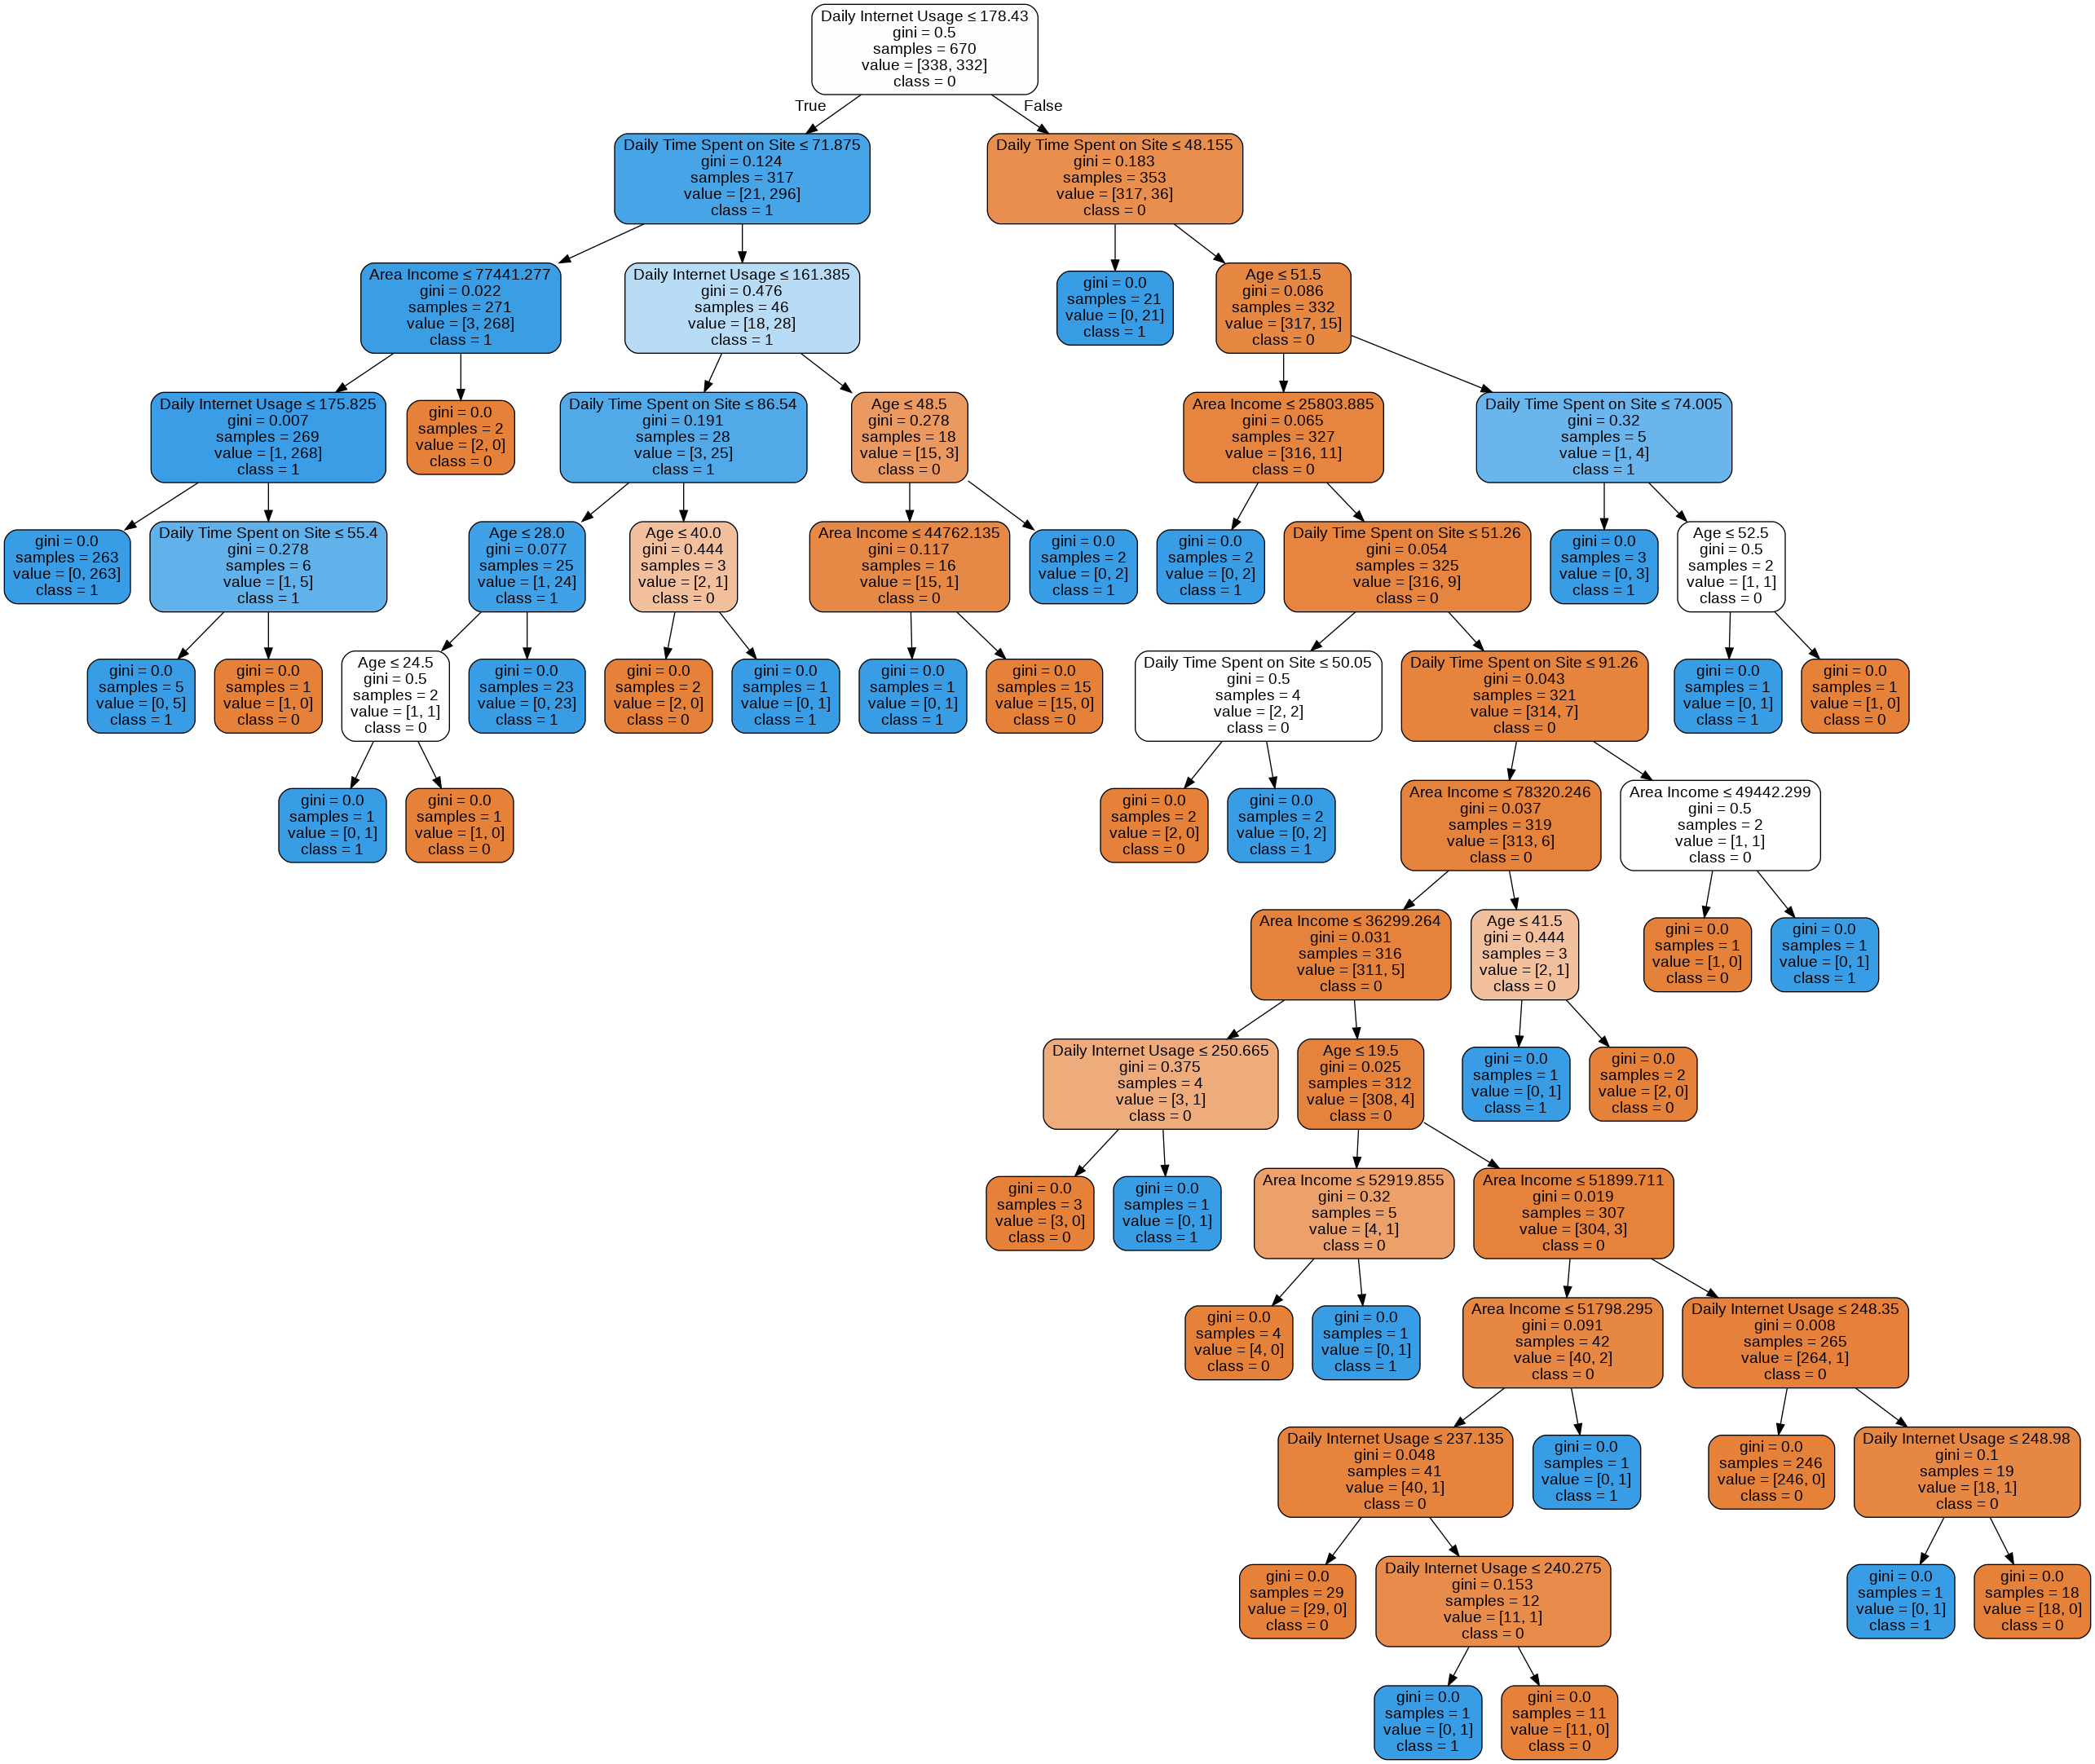

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
 #   'Male', 'Month', 'Day of the month' ,'Day of the week']]
feature_cols = [ 'Daily Internet Usage','Daily Time Spent on Site','Area Income','Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Advertising.png')
Image(graph.create_png())

# KNN Classifier







In [ ]:
#KNN Classifier
#  create a classifier using k-Nearest Neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

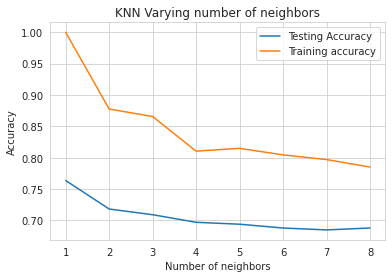

In [ ]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
print("Accuracy", knn.score(X_test,y_test)*100)

Accuracy 68.78787878787878
